## Monitor triplet performance

In [203]:
import gzip
from reddit.utils import load_tfrecord
import json
import numpy as np
from pathlib import Path
import glob
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import random
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

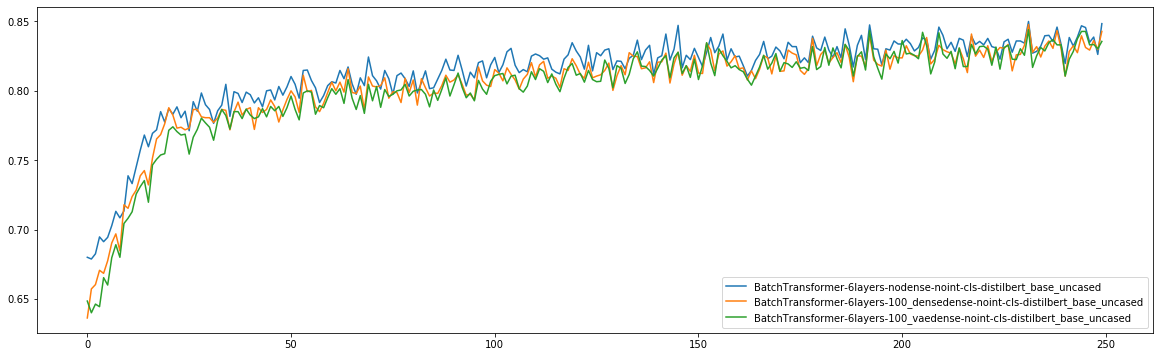

In [204]:
fig, ax = plt.subplots(figsize=(20,6))
fs = glob.glob('../logs/triplet/1anchor/*/metrics/*/*1.0/epoch-0')
for f in fs:
    d = json.load(open(f + '/log.json'))
    sns.lineplot(x=range(len(np.arange(0, 1000000, 32*100))), 
                         y=[np.mean(d['metrics'][i:i+32*100]) 
                            for i in np.arange(0, 1000000, 32*100)],
                 label=f.split('/')[-3])
    #plt.ylim(0.4,1)

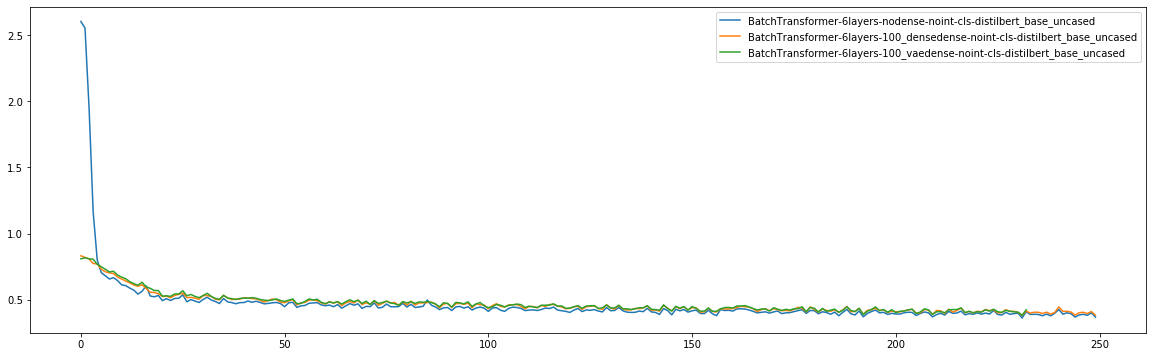

In [202]:
fig, ax = plt.subplots(figsize=(20,6))
fs = glob.glob('../logs/triplet/1anchor/*/metrics/*/*1.0/epoch-0')
for f in fs:
    d = json.load(open(f + '/log.json'))
    sns.lineplot(x=range(len(np.arange(0, 1000000, 32*100))), 
                         y=[np.mean(d['losses'][i:i+32*100]) 
                            for i in np.arange(0, 1000000, 32*100)],
                 label=f.split('/')[-3])
    #plt.ylim(0.4,1)

In [199]:
fs = glob.glob('../logs/triplet/1anchor/*/metrics/*/*1.0/epoch-0')
for f in fs:
    d = json.load(open(f + '/log.json'))
    print(f.split('/')[-3], 'test: ' + str(np.mean(d['test_metrics'])), 'train: ' + str(np.mean(d['metrics'])))

BatchTransformer-6layers-nodense-noint-cls-distilbert_base_uncased test: 0.834535 train: 0.81252375
BatchTransformer-6layers-100_densedense-noint-cls-distilbert_base_uncased test: 0.829025 train: 0.8040425
BatchTransformer-6layers-100_vaedense-noint-cls-distilbert_base_uncased test: nan train: 0.7983131868131869
